In [1]:
from pathlib import Path
from pprint import pprint

import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd
from PIL import Image

import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.layers import Conv2D, Dense, Dropout, GlobalMaxPooling2D, Input, Flatten, MaxPooling2D, Lambda, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# paths to train and test data
train_data_dir = 'C:/Users/miche/Tesi/train_data_real_2'
test_data_dir = 'C:/Users/miche/Tesi/test_data_real_2'

In [3]:
# creating generators
datagen = ImageDataGenerator(rescale=1 / 255.0)

train_batch_size, test_batch_size = 27, 147
train_generator = datagen.flow_from_directory(
    directory=train_data_dir,
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=train_batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42)

test_generator = datagen.flow_from_directory(
    directory=test_data_dir,
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=test_batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42)

Found 27 images belonging to 12 classes.
Found 145 images belonging to 12 classes.


In [4]:
train_dataset, y_train = next(train_generator)
test_dataset, y_test = next(test_generator)

train_labels = np.empty(len(y_train), dtype=int)
test_labels = np.empty(len(y_test), dtype=int)

for i in range(len(y_train)):
    train_labels[i] = (np.where(y_train[i]==1)[0][0])
for j in range(len(y_test)):
    test_labels[j] = (np.where(y_test[j]==1)[0][0])

stampa = test_dataset

In [5]:
def stampa(ds, ds_labels, class_names):
  fig = plt.figure()
  for i in range(9):
      plt.subplot(3,3,i+1)
      plt.tight_layout()
      plt.imshow(ds[i])
      plt.title("Oggetto: {}".format(class_names[train_labels[i]]))
      plt.xticks([])
      plt.yticks([])

In [6]:
# plotting some samples
CLASS_NAMES = ['barrier','building','bus','cone','duckie','duckiebot','road','stop','trafficlight','tree','truck','wall']

In [7]:
model = load_model("C:/Users/miche/Tesi/results/simulator_4.h5")
loss_and_metrics = model.evaluate(test_dataset, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

145/145 - 0s - loss: 9.5817 - accuracy: 0.1724
Test Loss 9.581675759677228
Test Accuracy 0.1724138


In [8]:
predicted_classes_crossentropy = model.predict_classes(test_dataset)

# see which we predicted correctly and which not
correct_indices_crossentropy = np.nonzero(predicted_classes_crossentropy == test_labels)[0]
incorrect_indices_crossentropy = np.nonzero(predicted_classes_crossentropy != test_labels)[0]
print()
print(len(correct_indices_crossentropy)," classified correctly")
print(len(incorrect_indices_crossentropy)," classified incorrectly")


25  classified correctly
120  classified incorrectly


In [9]:
import time

In [10]:
t0= time.clock()
model.predict(test_dataset)
t1 = time.clock() - t0
print("Time elapsed: ", t1, " seconds")

Time elapsed:  0.3483428  seconds


In [11]:
prova = test_dataset[0]
prova = prova.reshape(1,48,48,3)
t0= time.clock()
model.predict(prova)
t1 = time.clock() - t0
print("Time elapsed: ", t1, " seconds")

Time elapsed:  0.04294389999999998  seconds


In [12]:
def stampa_eval(correct_indices, incorrect_indices, predicted_classes):
  # adapt figure size to accomodate 18 subplots
  plt.rcParams['figure.figsize'] = (14,14)

  figure_evaluation = plt.figure()

  # plot 9 correct predictions
  for i, correct in enumerate(correct_indices[:9]):
      plt.subplot(6,3,i+1)
      plt.imshow(test_dataset[correct], interpolation='none')
      plt.title(
        "Predicted: {}, Truth: {}".format(CLASS_NAMES[predicted_classes[correct]],
                                          CLASS_NAMES[test_labels[correct]]))
      plt.xticks([])
      plt.yticks([])

  # plot 9 incorrect predictions
  for i, incorrect in enumerate(incorrect_indices[:9]):
      plt.subplot(6,3,i+10)
      plt.imshow(test_dataset[incorrect], interpolation='none')
      plt.title(
        "Predicted: {}, Truth: {}".format(CLASS_NAMES[predicted_classes[incorrect]], 
                                        CLASS_NAMES[test_labels[incorrect]]))
      plt.xticks([])
      plt.yticks([])

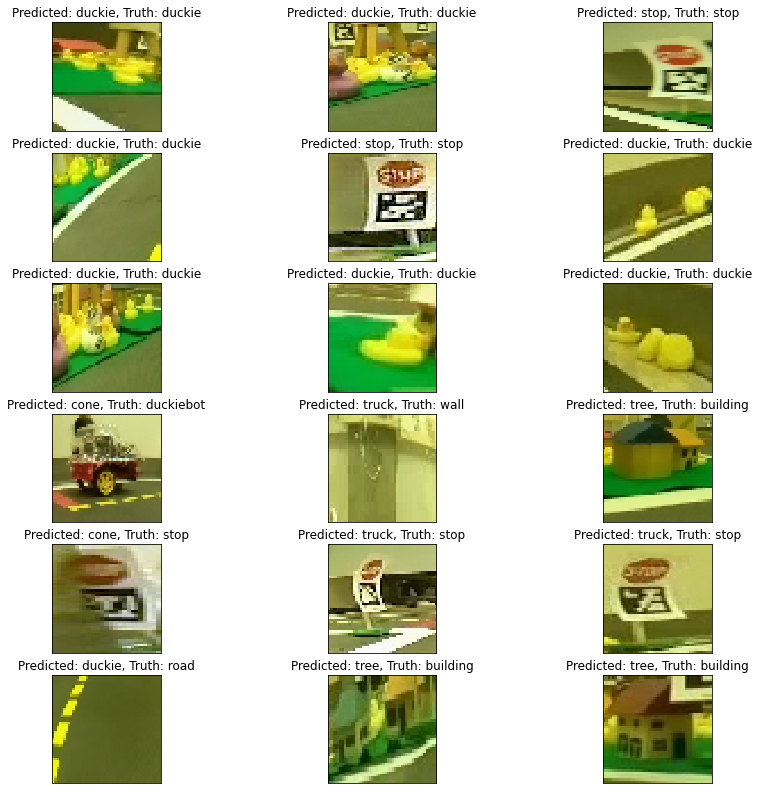

In [13]:
stampa_eval(correct_indices_crossentropy, incorrect_indices_crossentropy, predicted_classes_crossentropy)

In [14]:
model.fit(train_dataset, y_train,
          batch_size=5, epochs=150,
          verbose=2,
          validation_data=(test_dataset, y_test))

Train on 27 samples, validate on 145 samples
Epoch 1/150
27/27 - 3s - loss: 9.9787 - accuracy: 0.2963 - val_loss: 3.2919 - val_accuracy: 0.4069
Epoch 2/150
27/27 - 1s - loss: 4.7556 - accuracy: 0.4444 - val_loss: 1.9920 - val_accuracy: 0.4552
Epoch 3/150
27/27 - 1s - loss: 3.1525 - accuracy: 0.3333 - val_loss: 1.4900 - val_accuracy: 0.4828
Epoch 4/150
27/27 - 1s - loss: 1.7516 - accuracy: 0.3704 - val_loss: 1.4109 - val_accuracy: 0.4759
Epoch 5/150
27/27 - 1s - loss: 1.2939 - accuracy: 0.3704 - val_loss: 1.2728 - val_accuracy: 0.5241
Epoch 6/150
27/27 - 1s - loss: 1.0898 - accuracy: 0.5185 - val_loss: 1.4717 - val_accuracy: 0.4690
Epoch 7/150
27/27 - 1s - loss: 0.8064 - accuracy: 0.7037 - val_loss: 1.0154 - val_accuracy: 0.6483
Epoch 8/150
27/27 - 1s - loss: 0.6217 - accuracy: 0.8148 - val_loss: 1.2344 - val_accuracy: 0.5655
Epoch 9/150
27/27 - 1s - loss: 0.6472 - accuracy: 0.6667 - val_loss: 1.0071 - val_accuracy: 0.7241
Epoch 10/150
27/27 - 1s - loss: 0.5084 - accuracy: 0.8519 - val_

Epoch 83/150
27/27 - 1s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.5587 - val_accuracy: 0.8069
Epoch 84/150
27/27 - 1s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.5518 - val_accuracy: 0.8069
Epoch 85/150
27/27 - 1s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.5520 - val_accuracy: 0.8069
Epoch 86/150
27/27 - 1s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.5510 - val_accuracy: 0.8069
Epoch 87/150
27/27 - 1s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.5502 - val_accuracy: 0.8000
Epoch 88/150
27/27 - 1s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.5472 - val_accuracy: 0.8069
Epoch 89/150
27/27 - 1s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.5243 - val_accuracy: 0.8069
Epoch 90/150
27/27 - 1s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.5279 - val_accuracy: 0.8069
Epoch 91/150
27/27 - 1s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.5319 - val_accuracy: 0.8069
Epoch 92/150
27/27 - 1s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.5334 - val_accuracy: 0.8069


In [15]:
loss_and_metrics = model.evaluate(test_dataset, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

145/145 - 0s - loss: 0.5580 - accuracy: 0.8069
Test Loss 0.5579641403823064
Test Accuracy 0.80689657


In [16]:
predicted_classes_crossentropy = model.predict_classes(test_dataset)

# see which we predicted correctly and which not
correct_indices_crossentropy = np.nonzero(predicted_classes_crossentropy == test_labels)[0]
incorrect_indices_crossentropy = np.nonzero(predicted_classes_crossentropy != test_labels)[0]
print()
print(len(correct_indices_crossentropy)," classified correctly")
print(len(incorrect_indices_crossentropy)," classified incorrectly")


117  classified correctly
28  classified incorrectly


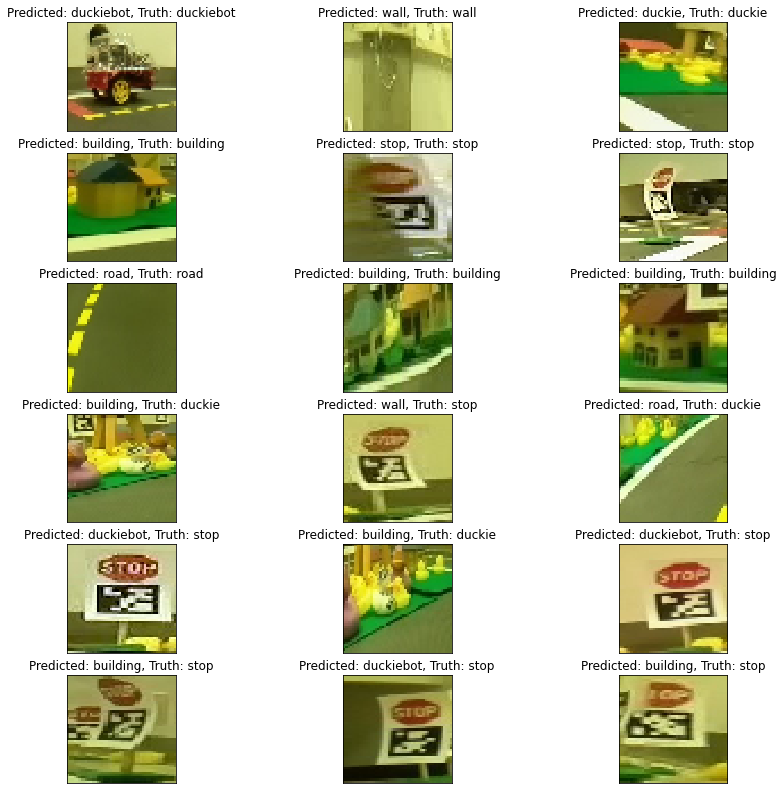

In [17]:
stampa_eval(correct_indices_crossentropy, incorrect_indices_crossentropy, predicted_classes_crossentropy)

In [18]:
t0= time.clock()
model.predict(test_dataset)
t1 = time.clock() - t0
print("Time elapsed: ", t1, " seconds")

Time elapsed:  0.6073650000000015  seconds


In [19]:
prova = test_dataset[0]
prova = prova.reshape(1,48,48,3)
t0= time.clock()
model.predict(prova)
t1 = time.clock() - t0
print("Time elapsed: ", t1, " seconds")

Time elapsed:  0.0650478000000021  seconds


In [20]:
dir = 'C:/Users/miche/Tesi/tests'
list_ds = tf.data.Dataset.list_files(dir+'*/*.jpg')

In [21]:
for f in list_ds.take(5):
  print(f.numpy())

b'C:\\Users\\miche\\Tesi\\tests\\prove\\prova5.jpg'
b'C:\\Users\\miche\\Tesi\\tests\\prove\\prova1.jpg'
b'C:\\Users\\miche\\Tesi\\tests\\prove\\prova7.jpg'


In [22]:
def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  return parts[-2] == CLASS_NAMES

In [23]:
IMG_HEIGHT, IMG_WIDTH = 192, 192
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])

In [24]:
def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [25]:
import os
AUTOTUNE = tf.data.experimental.AUTOTUNE
labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
for image, label in labeled_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (192, 192, 3)
Label:  [False False False False False False False False False False False False]


In [26]:
def prepare_for_training(ds, batch_size, cache=True, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  ds = ds.repeat()

  ds = ds.batch(batch_size)

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=AUTOTUNE)

  return ds

In [27]:
data = prepare_for_training(labeled_ds, batch_size=3)
image_batch, labels = next(iter(data))

(-0.5, 191.5, 191.5, -0.5)

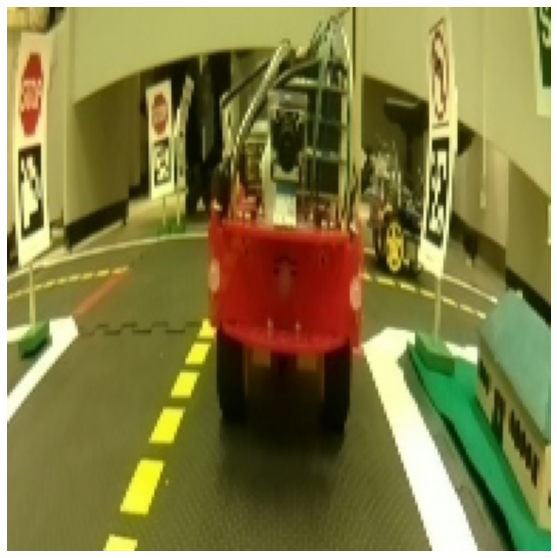

In [28]:
plt.figure(figsize=(10,10))
plt.imshow(image_batch[0])
plt.axis('off')

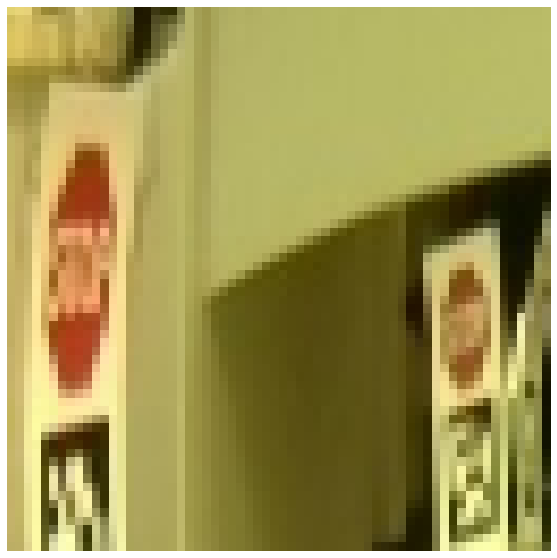

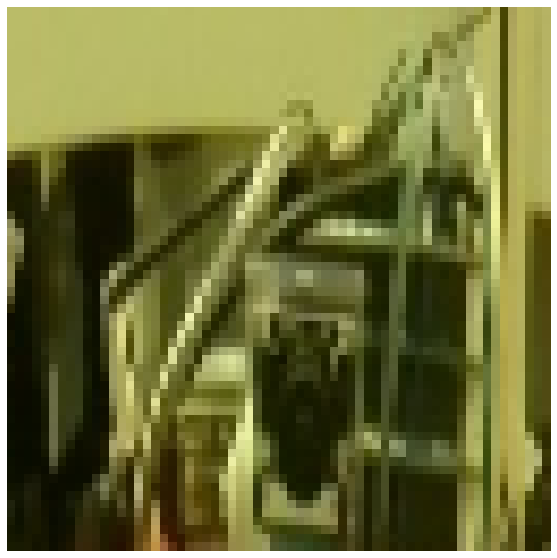

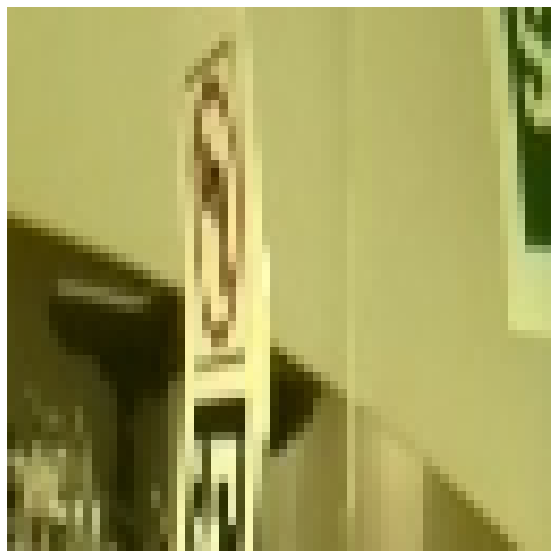

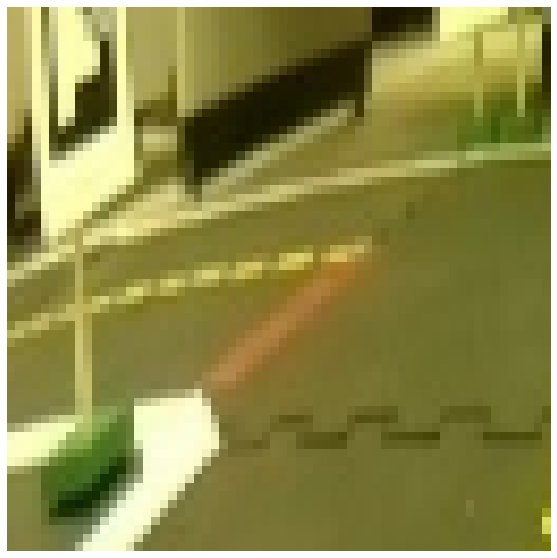

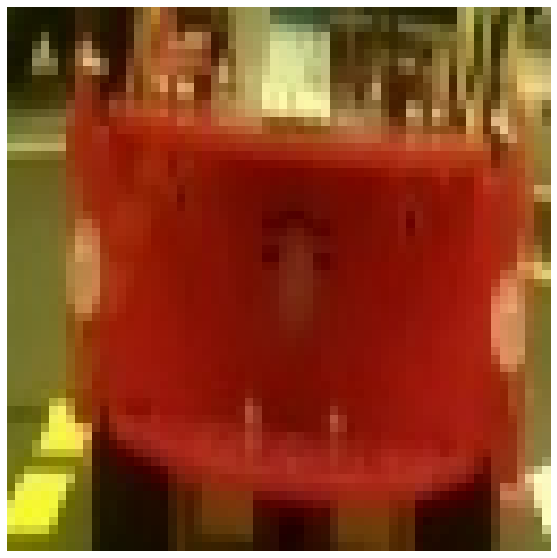

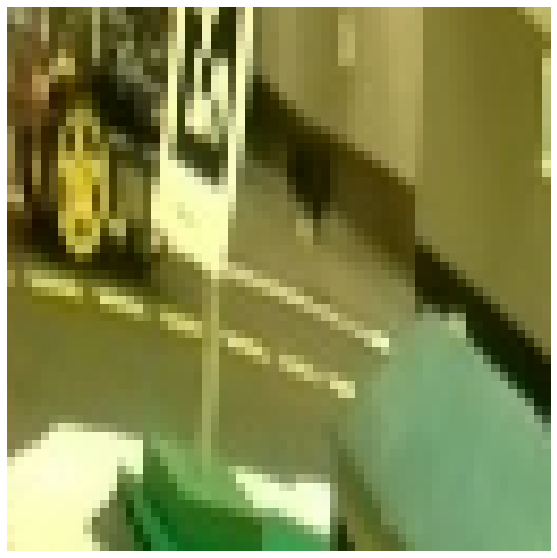

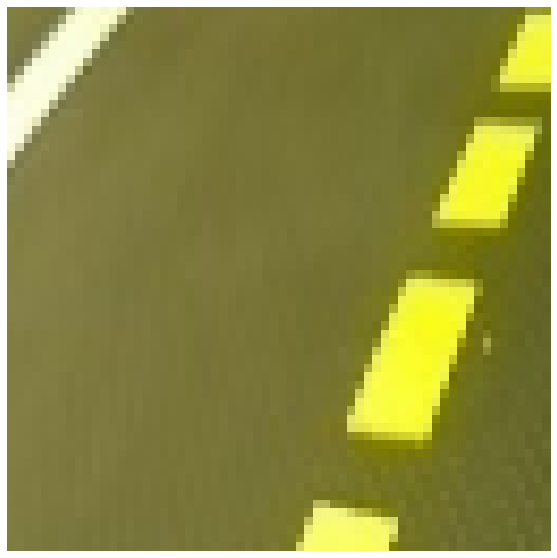

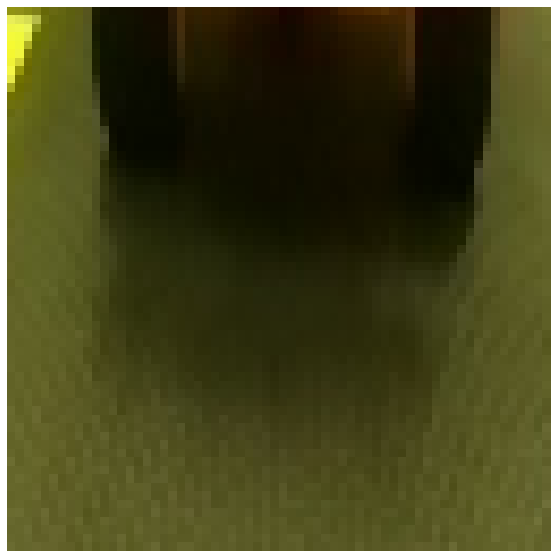

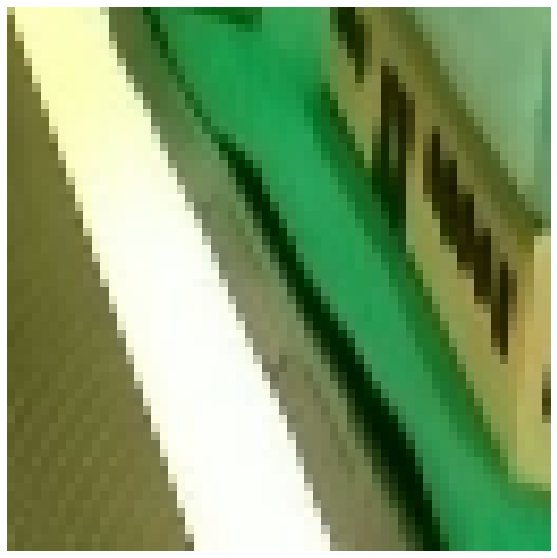

In [29]:
t0= time.clock()
image = image_batch[0]
patches = []
for i in range(3):
  for j in range(3):
    patch = tf.image.crop_to_bounding_box(image, i*64, j*64, 64, 64)
    patches.append(patch)
    plt.figure(figsize=(10,10))
    plt.imshow(patch)
    plt.axis('off')

In [30]:
batch = np.array(patches)
print(batch.shape)

(9, 64, 64, 3)


In [31]:
predicted_classes = model.predict_classes(batch)
t1 = time.clock() - t0
print("Time elapsed: ", t1, " seconds")
print(predicted_classes)

Time elapsed:  13.690998700000009  seconds
[ 5  5 11 11  5  1  6  6  1]


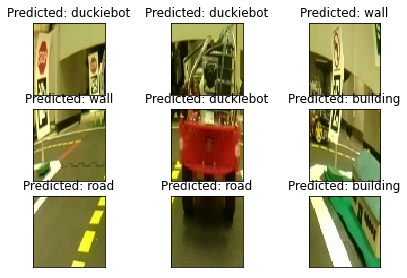

In [32]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

for i in range(9):
    plt.subplot(9,3,i+1)
    plt.imshow(patches[i], interpolation='none')
    plt.title(
      "Predicted: {}".format(CLASS_NAMES[predicted_classes[i]]))
    plt.xticks([])
    plt.yticks([])

(-0.5, 191.5, 191.5, -0.5)

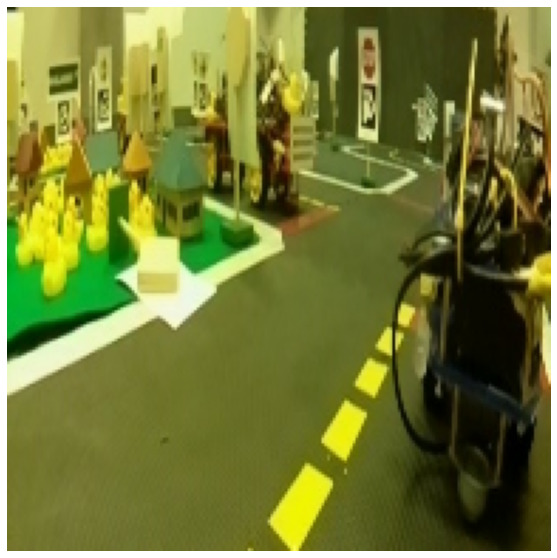

In [33]:
plt.figure(figsize=(10,10))
plt.imshow(image_batch[1])
plt.axis('off')

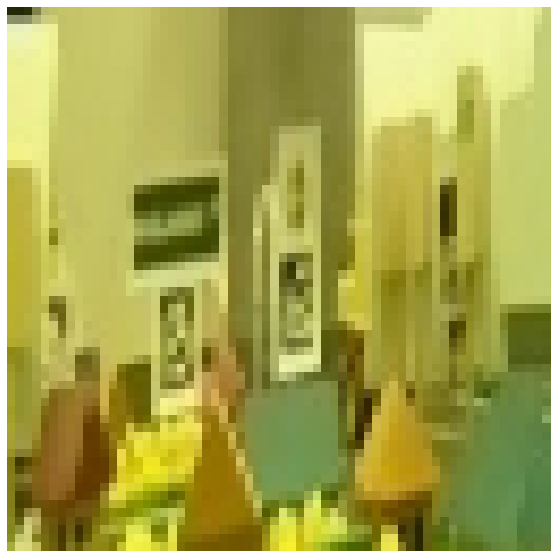

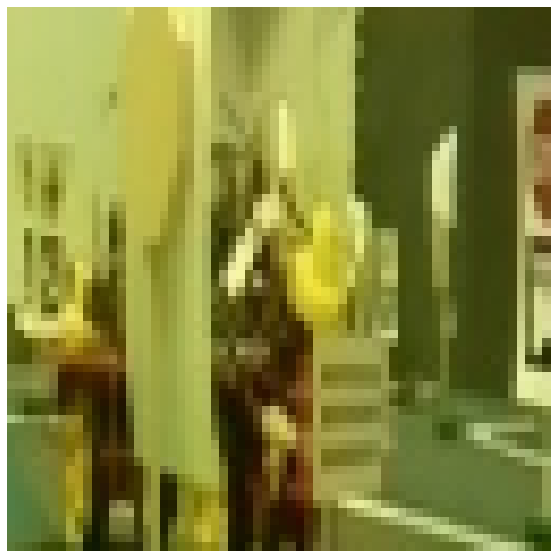

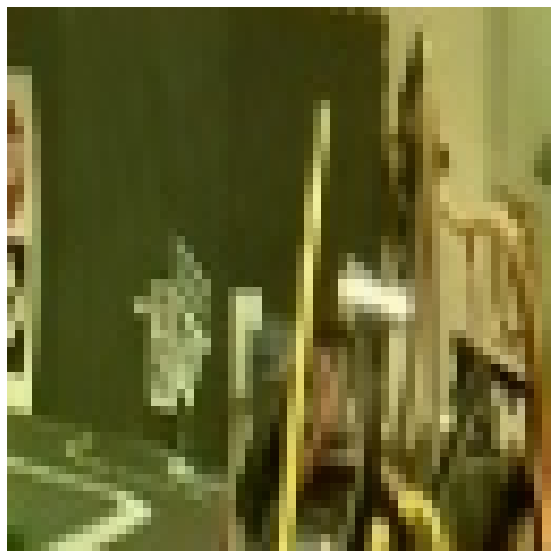

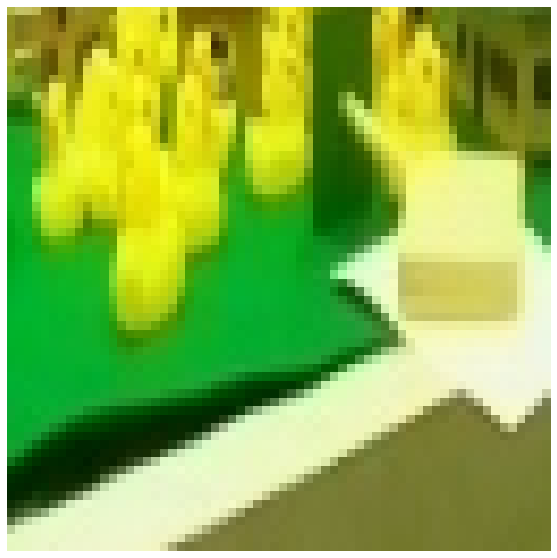

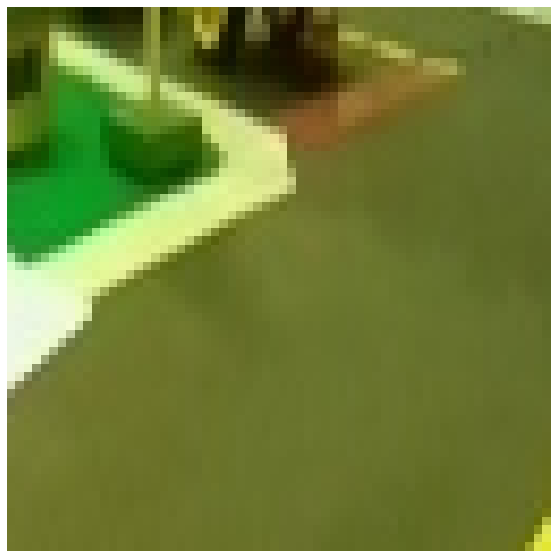

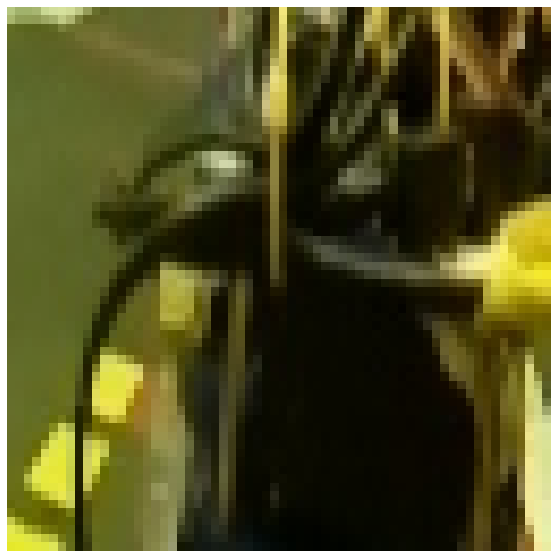

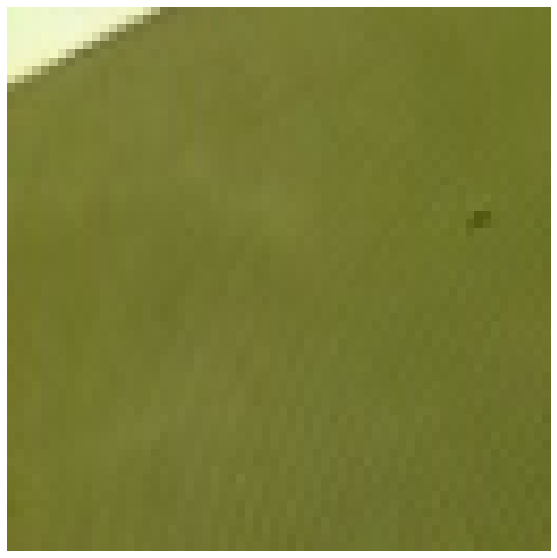

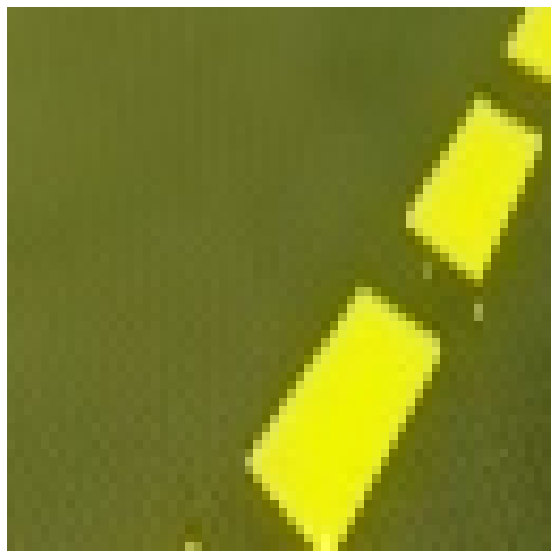

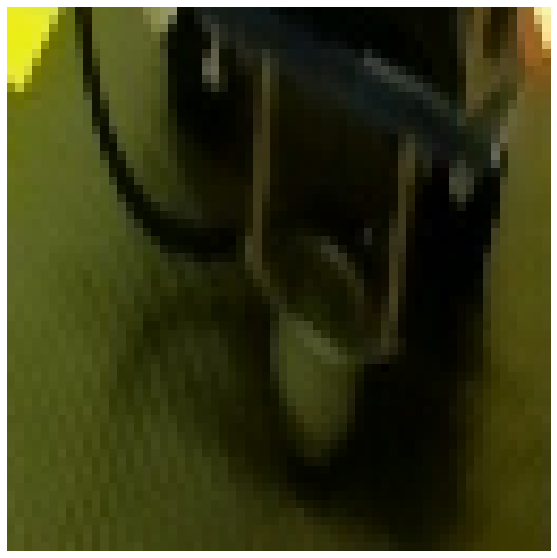

In [34]:
t0= time.clock()
image = image_batch[1]
patches = []
for i in range(3):
  for j in range(3):
    patch = tf.image.crop_to_bounding_box(image, i*64, j*64, 64, 64)
    patches.append(patch)
    plt.figure(figsize=(10,10))
    plt.imshow(patch)
    plt.axis('off')

In [35]:
batch = np.array(patches)
print(batch.shape)

(9, 64, 64, 3)


In [36]:
predicted_classes = model.predict_classes(batch)
t1 = time.clock() - t0
print("Time elapsed: ", t1, " seconds")
print(predicted_classes)

Time elapsed:  13.089981500000007  seconds
[ 6  5  5  4  1  5 11  6  6]


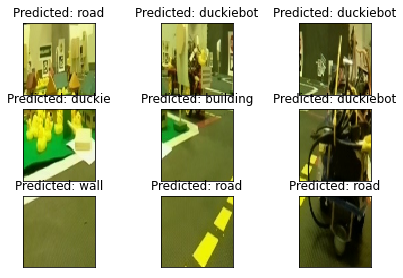

In [37]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

for i in range(9):
    plt.subplot(9,3,i+1)
    plt.imshow(patches[i], interpolation='none')
    plt.title(
      "Predicted: {}".format(CLASS_NAMES[predicted_classes[i]]))
    plt.xticks([])
    plt.yticks([])

(-0.5, 191.5, 191.5, -0.5)

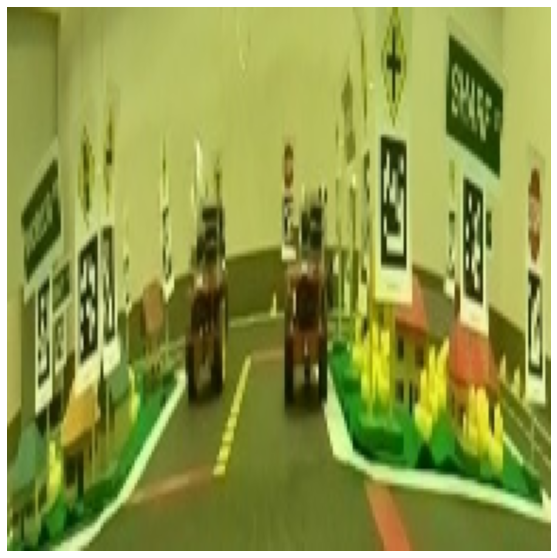

In [38]:
plt.figure(figsize=(10,10))
plt.imshow(image_batch[2])
plt.axis('off')

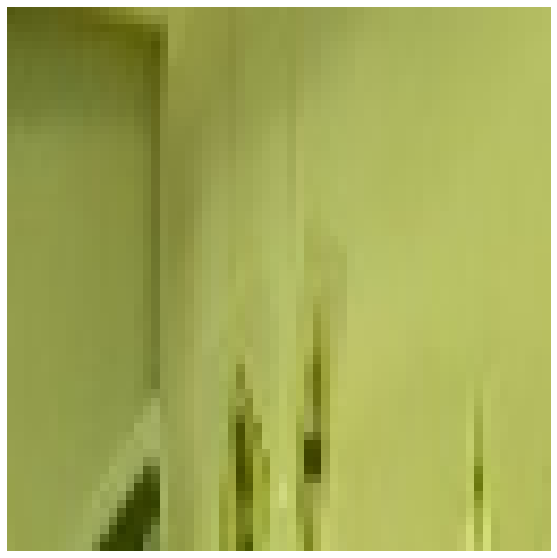

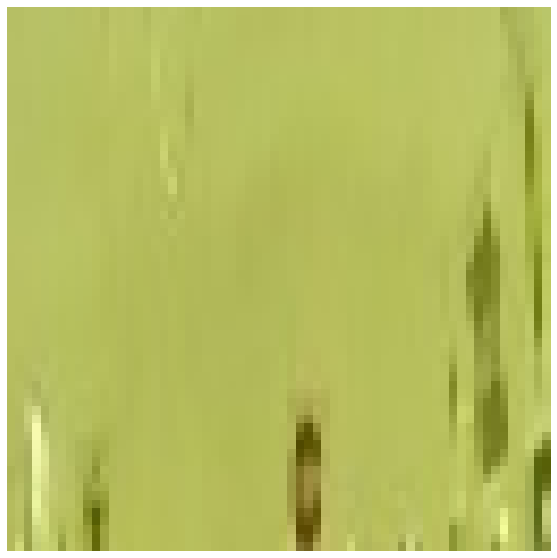

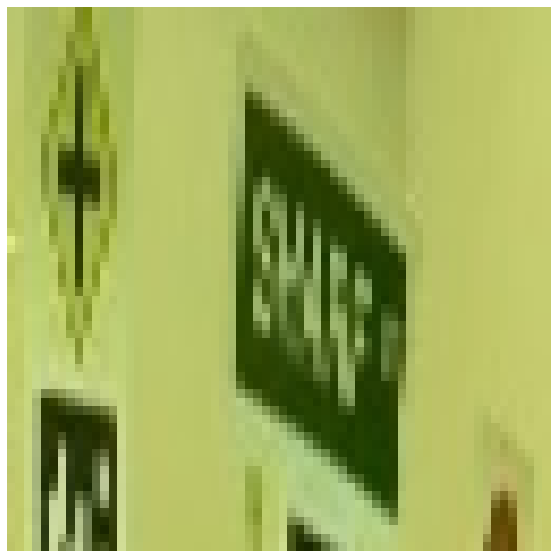

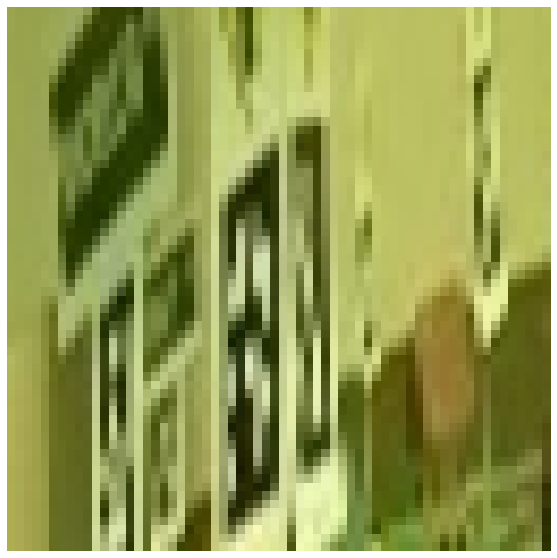

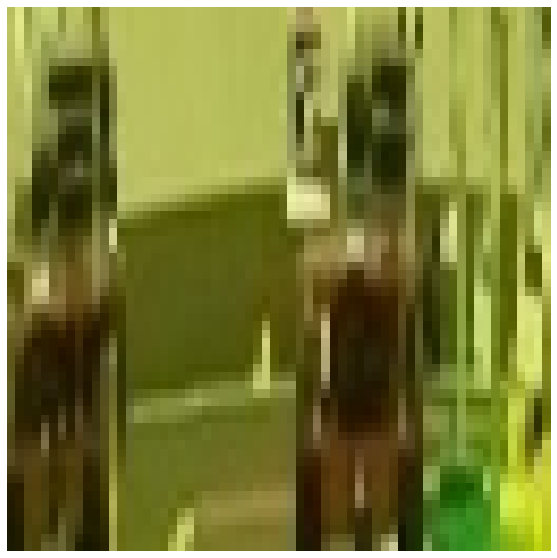

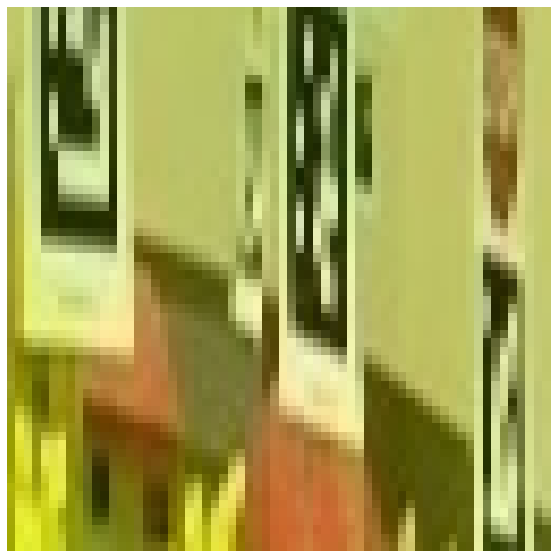

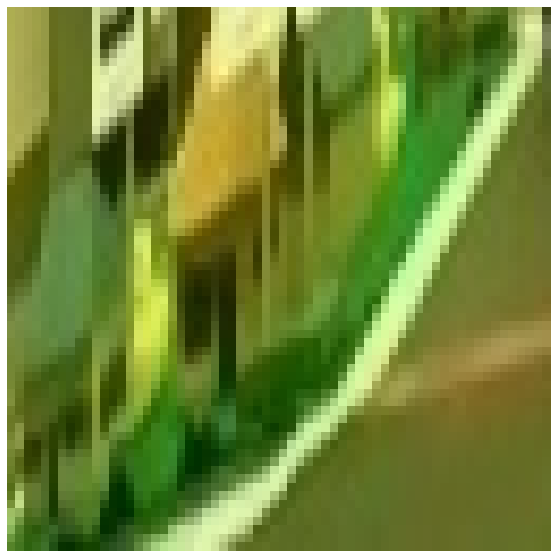

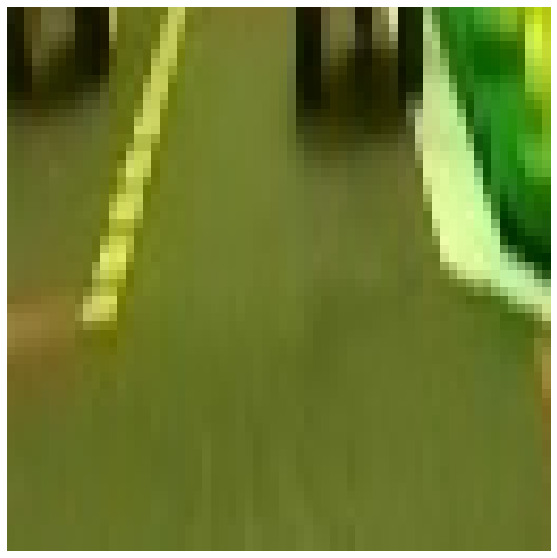

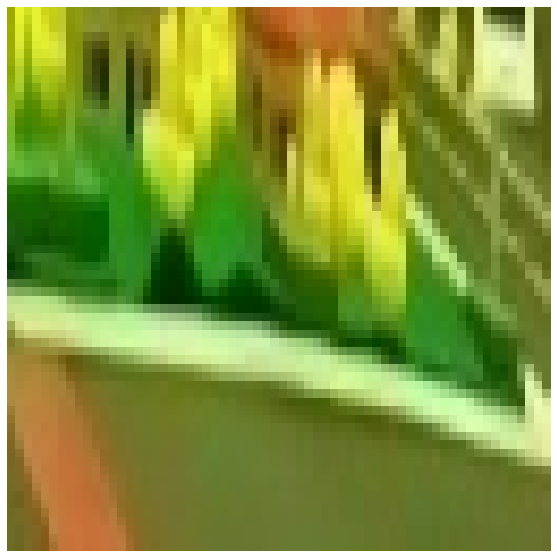

In [39]:
t0= time.clock()
image = image_batch[2]
patches = []
for i in range(3):
  for j in range(3):
    patch = tf.image.crop_to_bounding_box(image, i*64, j*64, 64, 64)
    patches.append(patch)
    plt.figure(figsize=(10,10))
    plt.imshow(patch)
    plt.axis('off')

In [40]:
batch = np.array(patches)
print(batch.shape)

(9, 64, 64, 3)


In [41]:
predicted_classes = model.predict_classes(batch)
t1 = time.clock() - t0
print("Time elapsed: ", t1, " seconds")
print(predicted_classes)

Time elapsed:  11.067344700000007  seconds
[11 11 11 11  5  5  1  1  1]


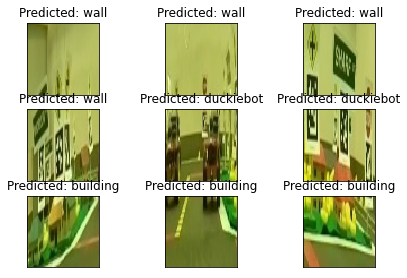

In [42]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

for i in range(9):
    plt.subplot(9,3,i+1)
    plt.imshow(patches[i], interpolation='none')
    plt.title(
      "Predicted: {}".format(CLASS_NAMES[predicted_classes[i]]))
    plt.xticks([])
    plt.yticks([])